# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [16]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

**Q2: Null Hypothesis:  The number of calls has no relationship with race (The probability that the person being called is black is 0.5).
Alternative hypothesis: The probability that the person being called is black is < 0.5


# Q1. What test is appropriate for this problem? Does CLT apply?
**The CLT does apply.. HHyptothesis permutation test (A/B test)

In [6]:
w = data[data.race=='w']
b = data[data.race=='b']

***
***
***
***

## Q3: Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

**Try bootstrapping method**

In [125]:
def diff_from_mean(data, diff= 98.6):
    return np.mean(data) -diff

def diff_frac(data_A, data_B):
    frac_A = np.sum(data_A)/len(data_A)
    frac_B = np.sum(data_B)/len(data_B)
    return frac_B - frac_A

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


def draw_perm_reps(data_1, data_2, func, size=1):

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic23
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

**Perform permutation test**

In [158]:
b_callbacks = sum(data[data.race=='b'].call)
w_callbacks = sum(data[data.race=='w'].call)
print(b_callbacks, w_callbacks)                  
                  
perm_replicates = np.empty(100000)
diff_frac_obs = diff_frac(data[data.race=='w'].call, data[data.race=='b'].call)

for i in range(100000):
    perm_replicates[i] = draw_perm_reps(data[data.race=='w'].call, data[data.race=='b'].call, diff_frac)
    
print(perm_replicates[1])                                                                               
p_value = np.sum(perm_replicates < diff_frac_obs)/100000
print(p_value)
print(diff_frac_obs)

157.0 235.0
0.01806981519507188
2e-05
-0.032032854209445585


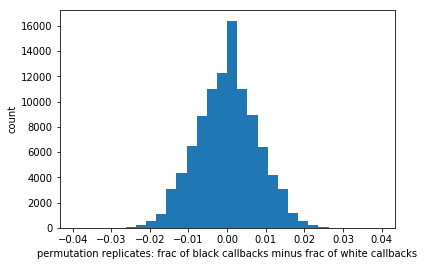

In [159]:
plt.hist(perm_replicates, bins = 30)
_ = plt.xlabel('permutation replicates: frac of black callbacks minus frac of white callbacks')
_ = plt.ylabel('count') 

**Calculate confidence interval and margin of error**

In [160]:
conf_int = np.percentile(perm_replicates, [2.5, 97.5])
#print("The confidence interval is: " + str(conf_int))
print("THis means that at the 95% confidence interval, differences in number of black vs white callbacks should only be "  + str(abs(conf_int[0])*2435))

THis means that at the 95% confidence interval, differences in number of black vs white callbacks should only be 38.000000000000014


In [161]:
mu =np.mean(perm_replicates)
sigma = np.std(perm_replicates)
std_err = sigma/np.sqrt(100000)
moe = 1.96*std_err
print(moe)
print((mu+moe)*2435, (mu-moe)*2435)

4.8310751672637074e-05
0.1091766803228713 -0.12609668032287125


In [167]:
Xbar = 157/2435-235/2435
print(diff_frac_obs)
n = 1
mu = np.mean(perm_replicates)
sigma = np.std(perm_replicates)
print(mu, sigma)

z= (Xbar - mu)/(sigma-np.sqrt(n))
print((Xbar - mu))
print(z)

import scipy.stats as st
print(st.norm.ppf(.95))
print("Probability that a value chosen out of distribution is diff_frac_obs or less is" + str(st.norm.cdf(z)))

-0.032032854209445585
-3.4743326488706315e-06 0.007794490344914407
-0.032029379876796715
0.032280993771069556
1.6448536269514722
Probability that a value chosen out of distribution is diff_frac_obs or less is0.5128760169606297


**Is above correct approach to frequentist approach?**
statsmodels.stats.proportion.proportions_ztest¶
http://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>